In [16]:
import pickle
import yaml
from pathlib import Path
import os

import numpy as np
import matplotlib.pyplot as plt

In [17]:
def saveFig(name, fig):
    fig.savefig(
        name,
        dpi=None,
        facecolor=fig.get_facecolor(),
        edgecolor="none",
        orientation="portrait",
        format="png",
        transparent=False,
        bbox_inches="tight",
        pad_inches=0.2,
        metadata=None,
    )

In [18]:
# Update the path belows to the directories containing the results for FedPFT and FedAvg
path_fedpft_resutls_cifar100 = os.path.join(os.path.realpath('..'),'outputs','2024-04-14','16-36-16')
path_fedpft_resutls_caltech101 = os.path.join(os.path.realpath('..'),'outputs','2024-04-14','16-44-20')

path_fedavg_resutls_cifar100 = os.path.join(os.path.realpath('..'),'outputs','2024-04-14','23-24-25')
path_fedavg_resutls_caltech101 = os.path.join(os.path.realpath('..'),'outputs','2024-04-14','22-32-11')


In [19]:
# load results
def read_accuracies(path_to_pickle):
    for result in list(Path(path_to_pickle).glob("*.pkl")):
        with open(result, "rb") as handle:
            data = pickle.load(handle)

        accuracies = data['history'].metrics_distributed['accuracy']
        return accuracies


In [20]:
fedpft_cifar = read_accuracies(path_fedpft_resutls_cifar100)
fedpft_caltech = read_accuracies(path_fedpft_resutls_caltech101)
fedavg_cifar = read_accuracies(path_fedavg_resutls_cifar100)
fedavg_caltech = read_accuracies(path_fedavg_resutls_caltech101)


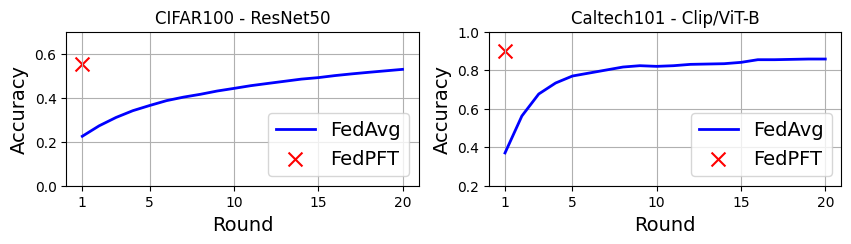

In [21]:
color1 = 'blue'
color2 = 'red'

def viz():
    fig, axs = plt.subplots(figsize=(10, 2), nrows=1, ncols=2)
    
    # cifar100
    axs[0].plot([r for r, _ in fedavg_cifar], [a for _, a in fedavg_cifar], label='FedAvg', color=color1, linewidth=2.0)
    axs[0].scatter([r for r, _ in fedpft_cifar], [a for _, a in fedpft_cifar], label='FedPFT', color=color2, marker='x', s=100)
    axs[0].set_title('CIFAR100 - ResNet50')
    axs[0].set_ylim(0, 0.7)
    
    # caltech101
    axs[1].plot([r for r, _ in fedavg_caltech], [a for _, a in fedavg_caltech], label='FedAvg', color=color1, linewidth=2.0)
    axs[1].scatter([r for r, _ in fedpft_caltech], [a for _, a in fedpft_caltech], label='FedPFT', color=color2, marker='x', s=100)
    axs[1].set_title('Caltech101 - Clip/ViT-B')
    axs[1].set_ylim(0.2, 1)
    
    for ax in axs:
        ax.set_xticks([1, 5, 10 , 15, 20])
        ax.grid()
        ax.legend(fontsize=14, loc='lower right')
        ax.set_xlabel("Round", fontsize=14)
        ax.set_ylabel("Accuracy", fontsize=14)

    return fig

f = viz()


In [22]:
saveFig("FedPft.png", f)